In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('toyota.csv')

In [35]:
df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


<Axes: >

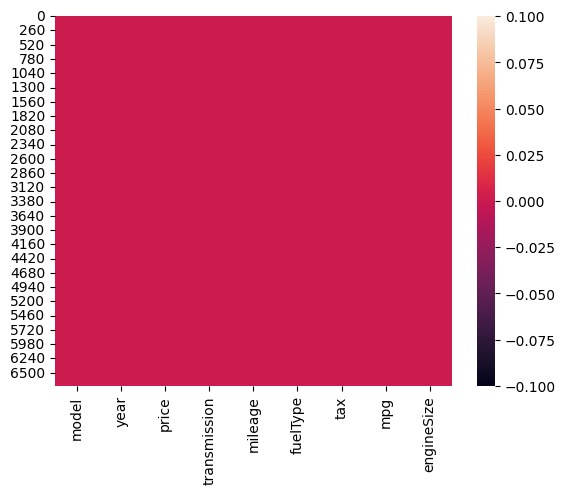

In [36]:
sns.heatmap(df.isnull())

In [37]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True)

In [38]:
# Jumlah mobil berdasarkan model
models = df.groupby('model').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()

models = models.rename(columns = { 'tax':'numberOfCars'})

<Axes: xlabel='model', ylabel='numberOfCars'>

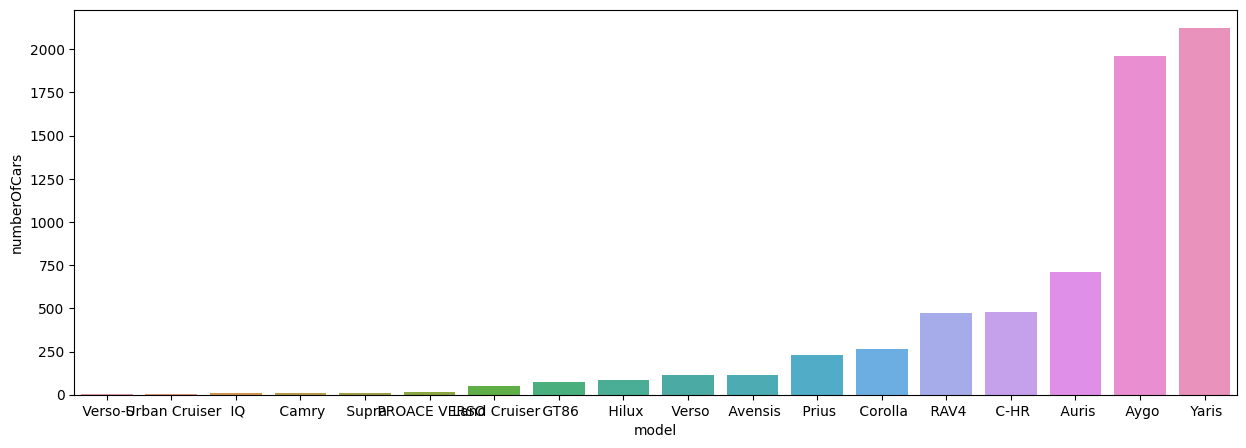

In [39]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x = models['model'], y = models['numberOfCars']) # 3rd param color='royalblue

In [40]:
# Ukuran Mesin
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns = {'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

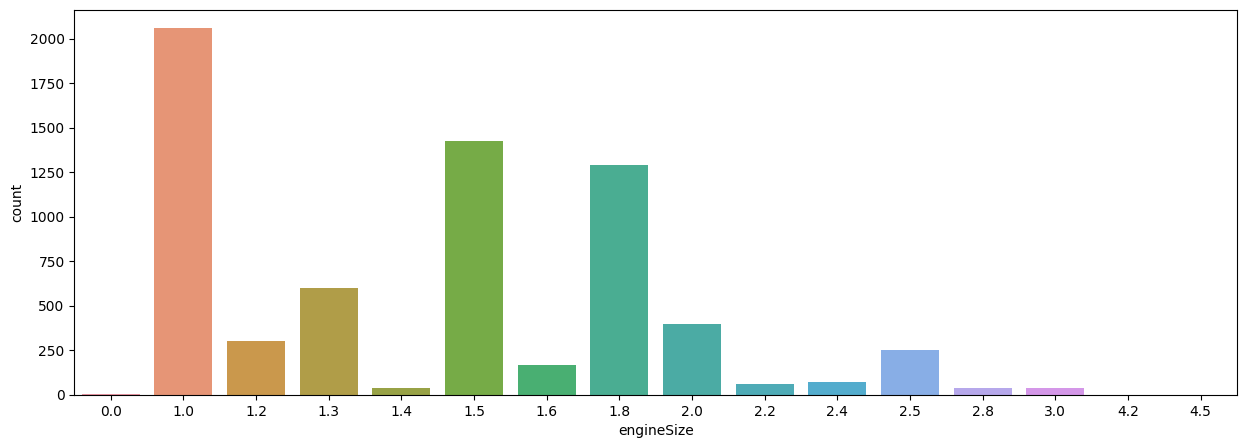

In [41]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x = engine['engineSize'], y = engine['count']) # 3rd param color='royalblue

C:\Users\kurzt\AppData\Local\Temp\ipykernel_8712\3609351401.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage']) # 3rd param color='royalblue


<Axes: xlabel='mileage', ylabel='Density'>

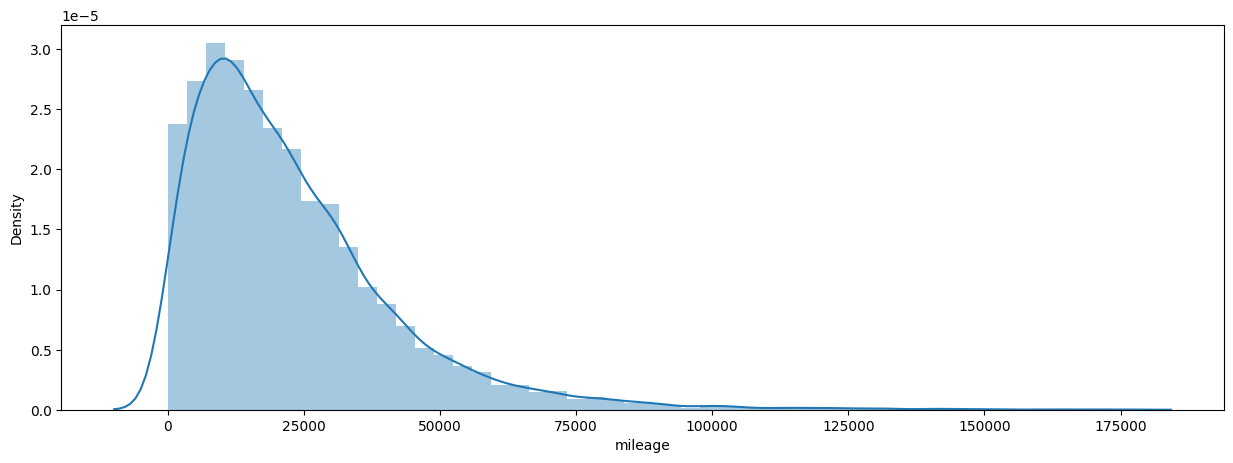

In [42]:
# Distribusi Mileage
fig = plt.figure(figsize=(15,5))
sns.distplot(df['mileage']) # 3rd param color='royalblue

C:\Users\kurzt\AppData\Local\Temp\ipykernel_8712\3048279456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

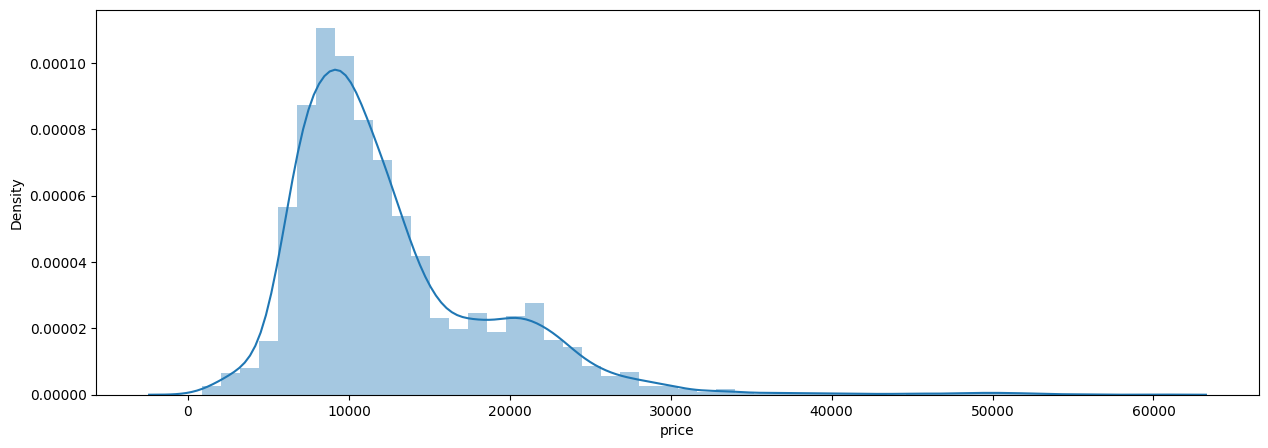

In [43]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

# Feature Selection

only choose feature with number type of data

In [44]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

x = df[features]
y = df['price']

x.shape, y.shape

((6738, 5), (6738,))

In [48]:
# Split data into training and testing

from sklearn.model_selection import train_test_split

x_train, X_test, y_train, y_test = train_test_split(x, y, random_state=70)
y_test.shape

(1685,)

In [49]:
# Making Regresi Linier Model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(X_test)

In [52]:
# Model accuration
score = lr.score(X_test, y_test)
print(score)

0.7678983314475204


In [57]:
# Membuat inputan model regresi linier

input_data = np.array([[2019, 5000, 145, 30.2, 2]])

prediction = lr.predict(input_data)
print('Estimasi berdasarkan prediksi : ', prediction)

Estimasi berdasarkan prediksi :  [21208.50538579]


c:\Users\kurzt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
# Keeping the model on pickle

import pickle

filename = 'predict_model.sav'
pickle.dump(lr, open(filename, 'wb'))